In [1]:
#Some important libraries we need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [2]:
train_df=pd.read_csv("train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df.shape

(1460, 81)

In [4]:
t_df1=train_df[["LotArea","Neighborhood","HouseStyle","FullBath","BedroomAbvGr","SalePrice"]].copy()
t_df1.head()

,LotArea,Neighborhood,HouseStyle,FullBath,BedroomAbvGr,SalePrice
0,8450,CollgCr,2Story,2,3,208500
1,9600,Veenker,1Story,2,3,181500
2,11250,CollgCr,2Story,2,3,223500
3,9550,Crawfor,2Story,1,3,140000
4,14260,NoRidge,2Story,2,4,250000


In [5]:
t_df1.groupby("Neighborhood")["Neighborhood"].agg("count")

Neighborhood
Blmngtn     17
Blueste      2
BrDale      16
BrkSide     58
ClearCr     28
CollgCr    150
Crawfor     51
Edwards    100
Gilbert     79
IDOTRR      37
MeadowV     17
Mitchel     49
NAmes      225
NPkVill      9
NWAmes      73
NoRidge     41
NridgHt     77
OldTown    113
SWISU       25
Sawyer      74
SawyerW     59
Somerst     86
StoneBr     25
Timber      38
Veenker     11
Name: Neighborhood, dtype: int64

In [6]:
t_df1.isnull().sum()

LotArea         0
Neighborhood    0
HouseStyle      0
FullBath        0
BedroomAbvGr    0
SalePrice       0
dtype: int64

In [7]:
t_df1["HouseStyle"].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [8]:
t_df1.groupby("HouseStyle")["HouseStyle"].agg("count")

HouseStyle
1.5Fin    154
1.5Unf     14
1Story    726
2.5Fin      8
2.5Unf     11
2Story    445
SFoyer     37
SLvl       65
Name: HouseStyle, dtype: int64

In [9]:
tem=t_df1.HouseStyle
tem.head()

0    2Story
1    1Story
2    2Story
3    2Story
4    2Story
Name: HouseStyle, dtype: object

In [10]:
def splitl(words):
    return list(words)

In [11]:
tem1=[]
for x in range(len(tem)):
    tem1.append(splitl(tem[x])[0])
   
    

In [12]:
t_df1["House_Storys"]=tem1

In [13]:
t_df1.head()

,LotArea,Neighborhood,HouseStyle,FullBath,BedroomAbvGr,SalePrice,House_Storys
0,8450,CollgCr,2Story,2,3,208500,2
1,9600,Veenker,1Story,2,3,181500,1
2,11250,CollgCr,2Story,2,3,223500,2
3,9550,Crawfor,2Story,1,3,140000,2
4,14260,NoRidge,2Story,2,4,250000,2


In [14]:
t_df1.groupby("House_Storys")["House_Storys"].agg("count")

House_Storys
1    894
2    464
S    102
Name: House_Storys, dtype: int64

In [15]:
df=t_df1[t_df1.House_Storys != "S"]

In [16]:
df.head()

,LotArea,Neighborhood,HouseStyle,FullBath,BedroomAbvGr,SalePrice,House_Storys
0,8450,CollgCr,2Story,2,3,208500,2
1,9600,Veenker,1Story,2,3,181500,1
2,11250,CollgCr,2Story,2,3,223500,2
3,9550,Crawfor,2Story,1,3,140000,2
4,14260,NoRidge,2Story,2,4,250000,2


In [17]:
df.shape

(1358, 7)

In [18]:
df.groupby("House_Storys")["House_Storys"].agg("count")

House_Storys
1    894
2    464
Name: House_Storys, dtype: int64

In [19]:
df =df.drop("HouseStyle",axis="columns")

In [20]:
df.head()

,LotArea,Neighborhood,FullBath,BedroomAbvGr,SalePrice,House_Storys
0,8450,CollgCr,2,3,208500,2
1,9600,Veenker,2,3,181500,1
2,11250,CollgCr,2,3,223500,2
3,9550,Crawfor,1,3,140000,2
4,14260,NoRidge,2,4,250000,2


In [21]:
df=df.astype({"House_Storys": "int"})

In [22]:
df.groupby("BedroomAbvGr")["BedroomAbvGr"].agg("count")

BedroomAbvGr
0      3
1     41
2    335
3    744
4    207
5     20
6      7
8      1
Name: BedroomAbvGr, dtype: int64

In [23]:
df.groupby("FullBath")["FullBath"].agg("count")

FullBath
0      5
1    587
2    736
3     30
Name: FullBath, dtype: int64

In [24]:
df1=df.copy()

In [25]:
df1["price_per_sqft"]= df1["SalePrice"]*10000/df1["LotArea"]
df1.head()

,LotArea,Neighborhood,FullBath,BedroomAbvGr,SalePrice,House_Storys,price_per_sqft
0,8450,CollgCr,2,3,208500,2,246745.562130
1,9600,Veenker,2,3,181500,1,189062.500000
2,11250,CollgCr,2,3,223500,2,198666.666667
3,9550,Crawfor,1,3,140000,2,146596.858639
4,14260,NoRidge,2,4,250000,2,175315.568022


In [26]:
len(df1.Neighborhood.unique())

25

In [27]:
df1.shape

(1358, 7)

In [28]:
df1.Neighborhood=df1.Neighborhood.apply(lambda x : x.strip())
Neighborhood_stats= df1.groupby("Neighborhood")["Neighborhood"].agg("count").sort_values(ascending=False)
Neighborhood_stats

Neighborhood
NAmes      198
CollgCr    144
OldTown    111
Edwards     89
Somerst     86
NridgHt     77
Gilbert     72
NWAmes      65
Sawyer      63
BrkSide     58
SawyerW     55
Crawfor     51
NoRidge     41
Mitchel     39
IDOTRR      37
Timber      34
StoneBr     25
ClearCr     25
SWISU       25
Blmngtn     17
BrDale      16
MeadowV     10
NPkVill      9
Veenker      9
Blueste      2
Name: Neighborhood, dtype: int64

In [29]:
len(Neighborhood_stats[Neighborhood_stats<=10])

4

In [30]:
Neighborhood_stats_less_10=Neighborhood_stats[Neighborhood_stats<=10]
Neighborhood_stats_less_10

Neighborhood
MeadowV    10
NPkVill     9
Veenker     9
Blueste     2
Name: Neighborhood, dtype: int64

In [31]:
len(df1.Neighborhood.unique())

25

In [32]:
df1.Neighborhood=df1.Neighborhood.apply(lambda x: "other" if x in Neighborhood_stats_less_10 else x)
len(df1.Neighborhood.unique())

22

In [33]:
df1.head(10)

,LotArea,Neighborhood,FullBath,BedroomAbvGr,SalePrice,House_Storys,price_per_sqft
0,8450,CollgCr,2,3,208500,2,246745.562130
1,9600,other,2,3,181500,1,189062.500000
2,11250,CollgCr,2,3,223500,2,198666.666667
3,9550,Crawfor,1,3,140000,2,146596.858639
4,14260,NoRidge,2,4,250000,2,175315.568022
5,14115,Mitchel,1,1,143000,1,101310.662416
6,10084,Somerst,2,3,307000,1,304442.681476
7,10382,NWAmes,2,3,200000,2,192641.109613
8,6120,OldTown,2,2,129900,1,212254.901961
9,7420,BrkSide,1,2,118000,1,159029.649596


In [34]:
df1.LotArea.unique

<bound method Series.unique of 0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1358, dtype: int64>

In [35]:
df1[df1.BedroomAbvGr>4]

,LotArea,Neighborhood,FullBath,BedroomAbvGr,SalePrice,House_Storys,price_per_sqft
118,12376,SawyerW,3,5,320000,2,258564.964447
137,11070,Mitchel,3,5,171000,1,154471.544715
144,9100,Sawyer,2,6,125000,1,137362.637363
198,5520,OldTown,1,5,104000,2,188405.797101
291,5687,SWISU,2,6,135900,2,238966.062951
328,11888,BrkSide,2,5,214500,2,180434.051144
330,10624,NAmes,2,6,119000,1,112010.542169
386,8410,Edwards,1,5,81000,1,96313.912010
570,13101,NAmes,2,6,142600,1,108846.652927
628,11606,NAmes,1,5,135000,2,116319.145270


In [36]:
df1[df1.LotArea/df1.BedroomAbvGr<300].head()

,LotArea,Neighborhood,FullBath,BedroomAbvGr,SalePrice,House_Storys,price_per_sqft


In [37]:
df1.shape

(1358, 7)

In [38]:
df1.price_per_sqft.describe()

count      1358.000000
mean     211843.086372
std      125075.171916
min       13904.409085
25%      137698.512029
50%      180227.544774
75%      240644.831051
max      953846.153846
Name: price_per_sqft, dtype: float64

In [39]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby("Neighborhood"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df2 = remove_pps_outliers(df1)
df2.shape

(1020, 7)

In [40]:
df2.head()

,LotArea,Neighborhood,FullBath,BedroomAbvGr,SalePrice,House_Storys,price_per_sqft
0,3010,Blmngtn,2,2,167240,1,555614.617940
1,3182,Blmngtn,2,2,192500,1,604965.430547
2,3182,Blmngtn,2,2,192000,1,603394.091766
3,3072,Blmngtn,2,2,178740,1,581835.937500
4,3922,Blmngtn,0,2,194201,1,495158.082611


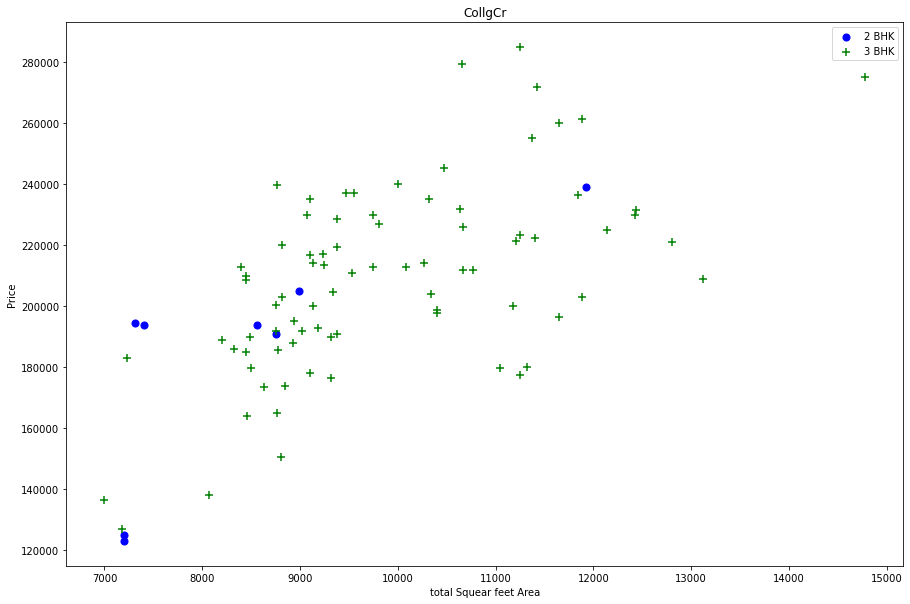

In [41]:
import matplotlib 
def plot_scatter_chart(df,Neighborhood):
    bhk2=df[(df.Neighborhood==Neighborhood) & (df.BedroomAbvGr==2)]
    bhk3 =df[(df.Neighborhood==Neighborhood) & (df.BedroomAbvGr==3)]
    matplotlib.rcParams["figure.figsize"]=(15,10)
    plt.scatter(bhk2.LotArea,bhk2.SalePrice,color="blue",label="2 BHK",s=50)
    plt.scatter(bhk3.LotArea,bhk3.SalePrice,color="green",marker="+",label="3 BHK",s=50)
    plt.xlabel("total Squear feet Area")
    plt.ylabel("Price")
    plt.title(Neighborhood)
    plt.legend()
    
#plot_scatter_chart(df2,"Blmngtn")
plot_scatter_chart(df2,"CollgCr")

In [42]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for Neighborhood, Neighborhood_df in df.groupby("Neighborhood"):
        bhk_stats={}
        for bhk, bhk_df in Neighborhood_df.groupby("BedroomAbvGr"):
            bhk_stats[bhk]={
                "mean":np.mean(bhk_df.price_per_sqft),
                "std" :np.std(bhk_df.price_per_sqft),
                "count":bhk_df.shape[0]
            }
        for bhk, bhk_df in Neighborhood_df.groupby("BedroomAbvGr"):
            stats=bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(exclude_indices,axis="index")

df3=remove_bhk_outliers(df2)
df3.shape

(709, 7)

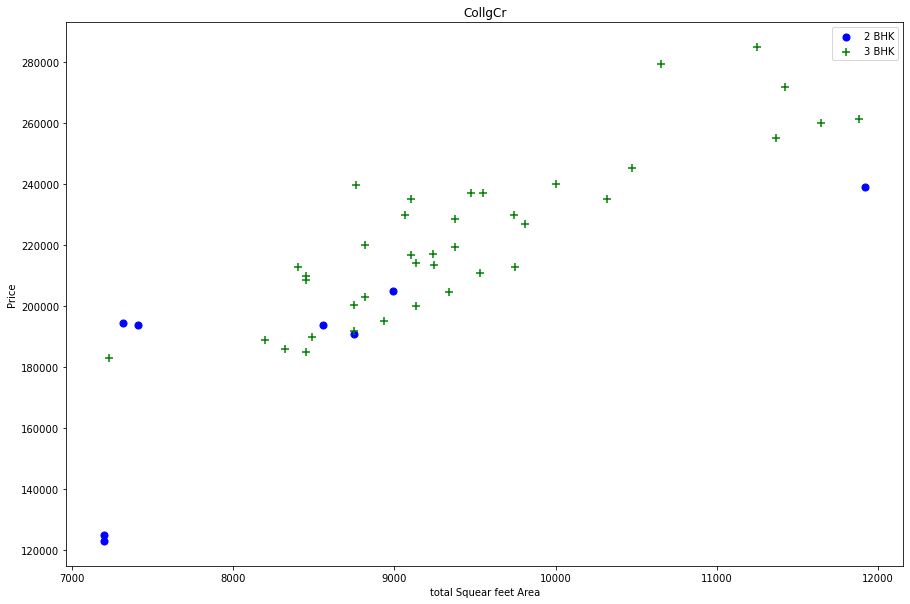

In [43]:
plot_scatter_chart(df3,"CollgCr")

Text(0, 0.5, 'count')

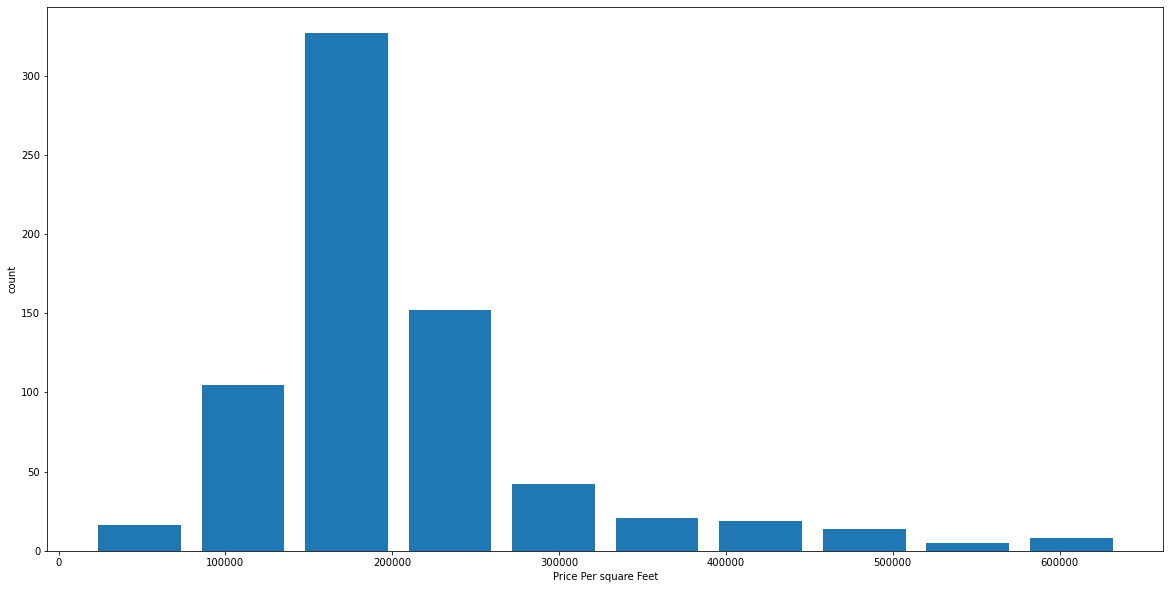

In [44]:
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df3.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per square Feet")
plt.ylabel("count")

In [45]:
df3.FullBath.unique()

array([2, 0, 1, 3], dtype=int64)

Text(0, 0.5, 'count')

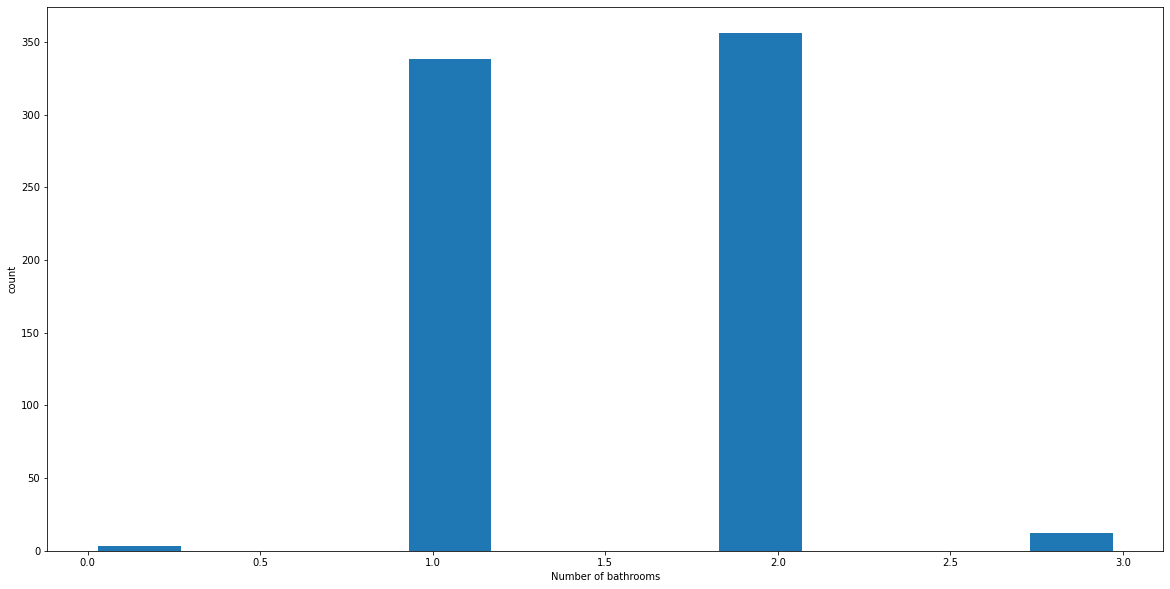

In [46]:
plt.hist(df3.FullBath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("count")

In [47]:
df3[df3.FullBath>df3.BedroomAbvGr+2]

,LotArea,Neighborhood,FullBath,BedroomAbvGr,SalePrice,House_Storys,price_per_sqft


In [48]:
df3.shape

(709, 7)

In [49]:
df3.head()

,LotArea,Neighborhood,FullBath,BedroomAbvGr,SalePrice,House_Storys,price_per_sqft
0,3010,Blmngtn,2,2,167240,1,555614.617940
1,3182,Blmngtn,2,2,192500,1,604965.430547
2,3182,Blmngtn,2,2,192000,1,603394.091766
3,3072,Blmngtn,2,2,178740,1,581835.937500
4,3922,Blmngtn,0,2,194201,1,495158.082611


In [50]:
dummies=pd.get_dummies(df3.Neighborhood)

In [51]:
dummies.head(3)

,Blmngtn,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,Mitchel,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df4=pd.concat([df3,dummies.drop("other",axis="columns")],axis="columns")
df4.head(3)

,LotArea,Neighborhood,FullBath,BedroomAbvGr,SalePrice,House_Storys,price_per_sqft,Blmngtn,BrDale,BrkSide,...,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber
0,3010,Blmngtn,2,2,167240,1,555614.617940,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3182,Blmngtn,2,2,192500,1,604965.430547,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3182,Blmngtn,2,2,192000,1,603394.091766,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df5=df4.drop(["Neighborhood","price_per_sqft"],axis="columns")
df5.head(2)

,LotArea,FullBath,BedroomAbvGr,SalePrice,House_Storys,Blmngtn,BrDale,BrkSide,ClearCr,CollgCr,...,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber
0,3010,2,2,167240,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3182,2,2,192500,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df5.House_Storys.unique()

array([1, 2])

In [55]:
x = df5.drop("SalePrice",axis="columns")
x.head()

,LotArea,FullBath,BedroomAbvGr,House_Storys,Blmngtn,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,...,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber
0,3010,2,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3182,2,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3182,2,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3072,2,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3922,0,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y=df5.SalePrice
y.head()

0    167240
1    192500
2    192000
3    178740
4    194201
Name: SalePrice, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [58]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6973062391186158

In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.66421532, 0.63169704, 0.70025537, 0.38141781, 0.68622901])

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [61]:
def find_best_model_using_gridsearchCV(x,y):
    algos={
        "linear_regression":{
            "model":LinearRegression(),
            "params":{
            }
        },
        "lasso":{
            "model":Lasso(),
            "params": {
                "alpha":[1,2],
                "selection":["random","cyclic"]
            }
        },
        "decision_tree":{
            "model":DecisionTreeRegressor(),
            "params":{
                "criterion":["friedman_mse"],
                "splitter":["best","random"]
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config["model"],config["params"],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            "model":algo_name,
            "best_score":gs.best_score_,
            "best_params":gs.best_params_
            
        })
    
    return pd.DataFrame(scores,columns=["model","best_score","best_params"])

In [62]:
find_best_model_using_gridsearchCV(x,y)

,model,best_score,best_params
0,linear_regression,0.612763,{}
1,lasso,0.612806,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.603387,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [68]:
x.columns

Index(['LotArea', 'FullBath', 'BedroomAbvGr', 'House_Storys', 'Blmngtn',
       'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards',
       'Gilbert', 'IDOTRR', 'Mitchel', 'NAmes', 'NWAmes', 'NoRidge', 'NridgHt',
       'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr',
       'Timber'],
      dtype='object')

In [104]:
def predict_price(location,sqft,bath,bhk,story):
    loc_index=np.where(x.columns==location)[0][0]
    
    X=np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk
    X[3]=story
    if loc_index>=0:
        X[loc_index]=1
    
    return lr_clf.predict([X])[0]
    

In [105]:
x.shape

(709, 25)

In [106]:
y.shape

(709,)

In [107]:
predict_price("BrkSide",1000,1,1,1)

C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93989.39085068365

In [108]:
predict_price("BrkSide",2000,1,1,1)

C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96337.01492104605